In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json 
%matplotlib inline

## GATHERING THE DATA

### Twitter Archive File

In [12]:
#Read csv file
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")

### Twitter API & JSON

In [13]:
from tweepy import OAuthHandler
from timeit import default_timer as timer


In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [15]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [16]:
# List of dictionaries to read tweet's JSON data line by line.
df_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
# Converting to a DataFrame        
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

### Tweets Image Pediction Data

In [17]:
#Downloading URL programatically using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Reading the TSV file
image_pred = pd.read_csv('image-predictions.tsv', sep='\t' )

## ASSESSING THE DATA

### Visual Assessment

In [21]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
tweet_count

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [23]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Visual Assessment Summary
### Twitter Archive Table
The following columns contain missing values: 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
retweeted_status_timestamp and expanded_urls.

### Image Prediction Table
Dog breeds in columns p1, p2, and p3 are in both uppercase and lowercase letters.

### Programmatic Assessment

In [24]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

tweet_id dataype should be an object and not int64

timestamp should be a datetime64 dtype and not object

In [25]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [26]:
#Checking to see if all denominator values equals 10
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [27]:
#Checking to see if all numerator values are greater than 10
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [28]:
# Checking if there are any records that are retweets in the dataset.
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [29]:
twitter_archive.name.value_counts()


None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
                 ... 
Ralphie             1
Kellogg             1
Michelangelope      1
Major               1
Harlso              1
Name: name, Length: 957, dtype: int64

In [30]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [31]:
tweet_count.sample(5)

,id_str,retweet_count,favorite_count
175,857746408056729600,11524,36021
2282,667192066997374976,115,414
345,831926988323639298,39,369
93,874012996292530176,11007,35501
1647,683742671509258241,3781,7162


In [32]:
tweet_count.duplicated().sum()

0

In [33]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The datatype of the tweet_id column should be object instead of int64.

The column name 'tweet_id' differs from 'id_str' in the tweet_count table.

Tweet IDs in the image_pred table are less than those in the twitter_archive table.

In [34]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
1999,875747767867523072,https://pbs.twimg.com/media/DCdH8YpUQAAiEbL.jpg,1,Labrador_retriever,0.799551,True,Chesapeake_Bay_retriever,0.179975,True,vizsla,0.004618,True
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True


In [35]:
image_pred.duplicated().sum()

0

### Programmatic Assessment Summary

### Quality
### Twitter Archive Table
- tweet_id dataype should be an object and not int64
- timestamp should be a datetime64 dtype and not object
- Not all in rating_denominator column equals ten
- Not all in  in rating_numerator column greater than ten
- Missing values in the name column indicated as 'none'. Aslo names that look incomplete such as 'a' are present.


### Tweet count table
- Tweet IDs in the tweet_count table are less than those in the twitter_archive table.
- Tweet ID column name differs from the 'twitter_archive' table.

### Image Prediction Table
- The datatype of the tweet_id column should be object instead of int64.
- Tweet IDs in the image_pred table are less than those in the twitter_archive table.


### Tidiness
### Twitter Archive Table
- The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns   doggo, floofer, pupper, and puppo.
- Information about one type of observational unit (tweets) is spread across three different files/dataframes.





### CLEANING THE DATA

In [36]:
#Making copies of the data
twitter_archive_clean = twitter_archive.copy()
tweet_count_clean = tweet_count.copy()
image_pred_clean = image_pred.copy()

#### CLEANING THE 'TWITTER_ARCHIVE_CLEAN' TABLE

#### Define

- Remove retweets by selecting only rows that have null values in retweet related columns.
- Remove features that won't be used in the analysis.

#### Code

In [37]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]


twitter_archive_clean = twitter_archive_clean.drop(['source', 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                                    'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [38]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define

- Merge the doggo, floofer, pupper and puppo columns to a stage column

#### Code

In [39]:

twitter_archive_clean['stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#### Test

In [40]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'stage'],
      dtype='object')

In [41]:
twitter_archive_clean.stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

#### Define
- Dropping the merged columns

#### Code

In [42]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [43]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


#### Define
- Provide a single rating column
- Drop numerator and denominator columns

#### Code

In [44]:
twitter_archive_clean["rating"] = twitter_archive_clean["rating_numerator"]/twitter_archive_clean["rating_denominator"]

twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [45]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'stage', 'rating'], dtype='object')

#### Define
- Convert the tweet_id column datatype from int64 to object
- Convert the timestamp column datatype from object to datetime

#### Code

In [46]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')

twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64')

#### Test

In [47]:
twitter_archive_clean.dtypes

tweet_id             object
timestamp    datetime64[ns]
text                 object
name                 object
stage                object
rating              float64
dtype: object

#### Define
- Replace none in name columns with nan to indicate null values.

#### Code

In [48]:
twitter_archive_clean.name = twitter_archive_clean.name.replace("None", value = np.nan )

#### Test

In [49]:
twitter_archive_clean.name.isnull().sum()

680

#### CLEANING THE 'TWEET_COUNT_CLEAN' TABLE

#### Define
Replace the column name id_str with tweet_id

In [50]:
tweet_count_clean.rename(columns={'id_str': 'tweet_id'}, inplace=True)

#### Test

In [51]:
tweet_count_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### CLEANING THE 'IMAGE_PRED_CLEAN' TABLE

#### Define
#### Create uniformity in cases p1, p2, p3 columns

#### Code

In [52]:
image_pred_clean.p1 = image_pred_clean.p1.str.title()
image_pred_clean.p2 = image_pred_clean.p2.str.title()
image_pred_clean.p3 = image_pred_clean.p3.str.title()

#### Test

In [53]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
- Determining  whether or not the #1 prediction is a breed of dog 

#### Code

In [54]:
#Assign null values when the image is not a dog
image_pred_clean["p1_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p2_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p3_dog"].replace(False, np.nan, inplace = True)

#### Test

In [55]:
#Drop null values so data only contains actual dog predictions
image_pred_clean.p1_dog.dropna()
image_pred_clean.p2_dog.dropna()
image_pred_clean.p3_dog.dropna()

0       True
1       True
2       True
3       True
4       True
        ... 
2066    True
2067    True
2070    True
2072    True
2073    True
Name: p3_dog, Length: 1499, dtype: object

#### Define
- Merge the 3 dataframes

#### Code

In [56]:
twitter_archive_clean['tweet_id']= twitter_archive_clean['tweet_id'].astype(str)
image_pred_clean['tweet_id']= image_pred_clean['tweet_id'].astype(str)

In [57]:
#Merging the first two dataframes
df_1 = pd.merge(twitter_archive_clean, tweet_count_clean, on=["tweet_id"])

#Merging the resultant dataframe with the last 3rd dataframe
df_final = pd.merge(df_1, image_pred_clean, on=["tweet_id"], how="left")

#### Test

In [58]:
df_final.head(2)

,tweet_id,timestamp,text,name,stage,rating,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,1.3,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,NaN,Bagel,0.085851,NaN,Banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,1.3,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### STORING THE DATA

In [59]:
df_final.to_csv('twitter_archive_master.csv', index=False)

In [60]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### ANALYZING & VISUALIZING THE DATA

In [61]:
#Making a copy of the stored data for analysis and visualization
df_master = twitter_archive_master.copy()

#### A. Exploring the descriptive statistics of the dataset

In [62]:
df_master.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.175000e+03,2175.0,2175.000000,2175.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.371205e+17,inf,2757.987126,8746.022989,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.748668e+16,NaN,4646.599662,12052.503836,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.0,0.000000,52.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.768432e+17,1.0,608.000000,1911.500000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.098528e+17,1.1,1341.000000,4042.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.894226e+17,1.2,3220.000000,11107.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,inf,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


##### The minimum rating for a tweet in the dataset was zero meaning there were tweets that were not rated.

##### The leaast number of images per tweet is 1 with the maximum being 4

### B. Correlation between the variables

In [63]:
df_master.corr()

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000000,0.049579,0.383249,0.629072,0.212854,0.106469,-0.002557,-0.049237
rating,0.049579,1.000000,0.010967,0.008391,0.000020,-0.008526,-0.014023,-0.005254
retweet_count,0.383249,0.010967,1.000000,0.911732,0.107198,0.054591,-0.018472,-0.044230
favorite_count,0.629072,0.008391,0.911732,1.000000,0.137053,0.079727,-0.021680,-0.053752
img_num,0.212854,0.000020,0.107198,0.137053,1.000000,0.204406,-0.156773,-0.141409
p1_conf,0.106469,-0.008526,0.054591,0.079727,0.204406,1.000000,-0.509531,-0.707994
p2_conf,-0.002557,-0.014023,-0.018472,-0.021680,-0.156773,-0.509531,1.000000,0.480743
p3_conf,-0.049237,-0.005254,-0.044230,-0.053752,-0.141409,-0.707994,0.480743,1.000000


##### 1. The correlation coefficient beteen retweet_count and favorite_count is 0..702881, indicating a positive correlation bewteen these metrics.

##### 2. There is a negative correlation of -0.709583 between p1_conf and p3_conf. The value of p3_conf is affected by the value of p1_conf. The more confident the first prediction in the neutral network the less accurate the subsequent prediction of the network

### C. Favorites and retweets analysis by months and days

In [64]:
df_master.timestamp = df_master.timestamp.astype('datetime64')

In [65]:
df_date = df_master.copy()
df_date = df_date[['timestamp', 'retweet_count' ,'favorite_count']]

# Extracting the 'month' and 'day' columns from timestamp column
df_date['month'] = df_date.timestamp.dt.month_name()
df_date['day'] = df_date.timestamp.dt.day_name()

# Grouping by number of favorites and retweets.
df_month = df_date.groupby('month').sum()
df_month

,retweet_count,favorite_count
month,,
April,344090,1275390
August,236496,696371
December,917356,2315370
February,482131,1746067
January,735314,2101070
July,633536,2369365
June,688633,2242580
March,497091,1725908
May,457453,1620587


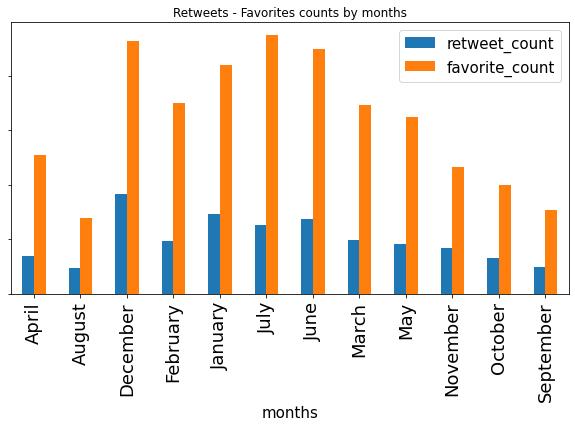

In [66]:
# Favorites and retweets by day
df_month = df_date.groupby('month').sum()


# plot
ax = df_month[['retweet_count','favorite_count']].plot(kind='bar', title ="Retweets - Favorites counts by months", figsize=(10, 5), legend=True, fontsize=18)

ax.set_xlabel("months", fontsize=15)
ax.set_yticklabels([])

plt.legend(prop={'size':15})

#December had the highest number of retweets

#July had the highest number of favorites

#December was the month with the highest activity


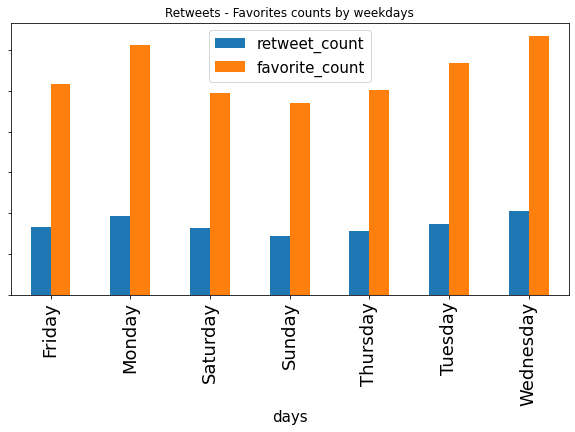

In [67]:
# Favorites and retweets by day
df_day = df_date.groupby('day').sum()


# plot
ax = df_day[['retweet_count','favorite_count']].plot(kind='bar', title ="Retweets - Favorites counts by weekdays", figsize=(10, 5), legend=True, fontsize=18)

ax.set_xlabel("days", fontsize=15)
ax.set_yticklabels([])

plt.legend(prop={'size':15})



#Wednesdays have the most activity during the week

### D.Analysis of dog stages

In [68]:
df_stage = df_master.groupby('stage').mean()
df_stage = df_stage[['rating','retweet_count', 'favorite_count']]
df_stage

,rating,retweet_count,favorite_count
stage,,,
None,inf,2577.940470,8371.456581
doggo,1.185333,6348.786667,17369.093333
floofer,1.180000,4083.600000,11674.900000
pupper,1.082051,2522.401709,7385.705128
puppo,1.208000,6847.040000,21871.080000


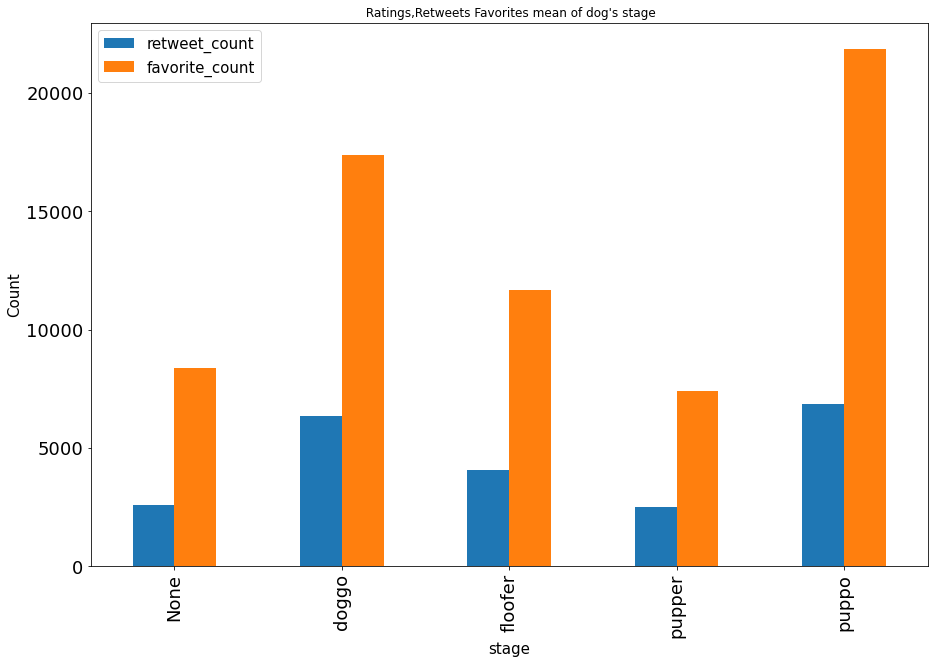

In [69]:
ax = df_stage[['retweet_count' , 'favorite_count']].plot(kind='bar', title =" Ratings,Retweets Favorites mean of dog's stage", figsize=(15, 10), legend=True, fontsize=18)

ax.set_xlabel("stage", fontsize=15)
ax.set_ylabel("Count", fontsize=15)

plt.legend(prop={'size':15})


plt.show()

#'doggo' and 'puppo' have received the highest number of retweets and favorites.